We first load the financial data into the R runtime workspace

In [87]:
library(magrittr)
library(corrplot)
load("./data/Financial.rda")

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


This dataset contains the financial information of about 100 companies including
their __type__ (type), __revenue__ (rev), __assets__ (assets), __return of investment__ (roe),
__Earnings Per Share__ (eps), __yield__ (yield), __Dividend Per Share__ (dps) and finally
their __Property, Plant and Equipment (ppe)__.

In [3]:
head(Financial)

company,type,rev,assets,roe,eps,yield,dps,ppe
AFLAC,6,7251,29454,17.1,2.08,0.9,0.22,11.5
Albertson's,4,14690,5219,21.4,2.08,1.6,0.63,19.0
Allstate,6,20106,80918,20.1,3.56,1.0,0.36,10.6
Amerada Hess,7,8340,7935,0.2,0.08,1.1,0.60,698.3
American General,6,3362,80620,7.1,2.19,3.0,1.40,21.2
American Stores,4,19139,8536,12.2,1.01,1.4,0.34,23.5


In [4]:
lapply(colnames(Financial), paste)

[[1]]
[1] "company"

[[2]]
[1] "type"

[[3]]
[1] "rev"

[[4]]
[1] "assets"

[[5]]
[1] "roe"

[[6]]
[1] "eps"

[[7]]
[1] "yield"

[[8]]
[1] "dps"

[[9]]
[1] "ppe"

In [5]:
fn_names <- c("Mean", "Median", "Standard Deviation")
fn <- list(mean, median, sd)

for (i in seq_along(fn)) {
    out <- sprintf("%s: %g", fn_names[i], fn[[i]](Financial$rev))
    print(out)
}


[1] "Mean: 11043.4"
[1] "Median: 6101"
[1] "Standard Deviation: 17479.1"


Let's find highest (max) revenue from all the companies

In [6]:
max(Financial$rev)

[1] 137242

Now lets find the row or record that owns the highest revenue

In [36]:
Financial[which.max(Financial$rev),]

,company,type,rev,assets,roe,eps,yield,dps,ppe
31,Exxon,7,137242,96064,19.4,3.37,2.8,1.63,17.1


How about finding the company with the lowest (min) revenue

In [37]:
Financial[which.min(Financial$rev),]

,company,type,rev,assets,roe,eps,yield,dps,ppe
72,Poe & Brown,6,129,194,25.1,1.48,1.5,0.35,16.3


What are the top 5 companies with the highest assets

In [7]:
Financial$assets %>% 
    order %>% 
    tail(5) %>% 
    `[`(Financial, .,)

,company,type,rev,assets,roe,eps,yield,dps,ppe
3,Allstate,6,20106,80918,20.1,3.56,1.0,0.36,10.6
31,Exxon,7,137242,96064,19.4,3.37,2.8,1.63,17.1
17,CIGNA,6,14935,108199,13.7,4.88,2.0,1.10,11.4
29,Equitable,6,9666,151438,12.3,2.86,0.5,0.20,13.4
87,Travelers,6,37609,386555,14.9,2.54,0.9,0.40,17.0


What is the standard deviation of “roe” values Try to calculate the standard deviation without using the sd() command and by formula, then use the sd() command and compare the results.

The code bellow is the functional way of representing the formula for standard deviation

In [20]:
minus <- `-`
pow <- `^`
divide_by <- `/`

st_dev <- Financial$roe %>%
    mean %>%
    minus(Financial$roe, .) %>%
    pow(2) %>%
    sum %>%
    divide_by(length(Financial$roe)) %>%
    sqrt

print(st_dev)

[1] 23.45448


The bellow cells are a procedural (step by step) way of representing the formula for standard deviation

In [5]:
mean_roe = mean(Financial$roe); mean_roe

[1] 18.334

In [6]:
mean_roe_diff = Financial$roe - mean_roe; mean_roe_diff

[1]  -1.234   3.066   1.766 -18.134 -11.234  -6.134  -1.634 -12.134  -8.834
 [10]   3.466 -12.334  -6.834  26.066  -6.034 -15.934   0.266  -4.634  -5.034
 [19]  -0.334  -9.134 -10.434   5.266  -4.434   2.966  -2.034  -6.034 -12.234
 [28] -14.134  -6.034  35.266   1.066  -6.134  15.366 209.666 -10.434 -11.434
 [37] -12.834 -10.034  -8.434  28.666 -10.334  -3.834   8.366  -7.234  -7.734
 [46] -17.934   0.666  27.866  -3.534   2.166  -7.334 -10.434  18.266  -5.734
 [55]  -1.534 -11.134  -6.034  -6.034  -4.834   6.666  -8.234  -4.234  -0.934
 [64]  -2.334  -8.934 -13.134 -10.634  -2.534   9.566 -12.534   1.566   6.766
 [73]  10.166  -6.934   0.366   1.466  -5.834  32.866   1.966   2.166  -0.334
 [82]  -3.634   2.566   7.966  -0.834  -7.434  -3.434  -8.834  10.466 -10.834
 [91]  10.566  -3.134  -5.734  -8.734  12.366  -9.134 -13.534  -3.034  -4.334
[100] -10.534

In [7]:
squared_diff = mean_roe_diff^2; squared_diff

[1]     1.522756     9.400356     3.118756   328.841956   126.202756
  [6]    37.625956     2.669956   147.233956    78.039556    12.013156
 [11]   152.127556    46.703556   679.436356    36.409156   253.892356
 [16]     0.070756    21.473956    25.341156     0.111556    83.429956
 [21]   108.868356    27.730756    19.660356     8.797156     4.137156
 [26]    36.409156   149.670756   199.769956    36.409156  1243.690756
 [31]     1.136356    37.625956   236.113956 43959.831556   108.868356
 [36]   130.736356   164.711556   100.681156    71.132356   821.739556
 [41]   106.791556    14.699556    69.989956    52.330756    59.814756
 [46]   321.628356     0.443556   776.513956    12.489156     4.691556
 [51]    53.787556   108.868356   333.646756    32.878756     2.353156
 [56]   123.965956    36.409156    36.409156    23.367556    44.435556
 [61]    67.798756    17.926756     0.872356     5.447556    79.816356
 [66]   172.501956   113.081956     6.421156    91.508356   157.101156
 [71]     2.452356    45.778756   103.347556    48.080356     0.133956
 [76]     2.149156    34.035556  1080.173956     3.865156     4.691556
 [81]     0.111556    13.205956     6.584356    63.457156     0.695556
 [86]    55.264356    11.792356    78.039556   109.537156   117.375556
 [91]   111.640356     9.821956    32.878756    76.282756   152.917956
 [96]    83.429956   183.169156     9.205156    18.783556   110.965156

In [8]:
squared_diff_sum = sum(squared_diff); squared_diff_sum

[1] 55011.24

In [12]:
stdev = sqrt(squared_diff_sum / length(Financial$roe)); stdev

[1] 23.45448

Let's compare the manual way of computing standard deviation with the in built function `sd` 

In [25]:
ib_stdev <- sd(Financial$roe); ib_stdev

[1] 23.57264

The difference between the manual way and in built way is

In [26]:
ib_stdev - st_dev

[1] 0.1181593

Let's view the skewness of rev, assets, roe, dps, and ppe. First we need to define the formula for skewness

In [35]:
skewness <- function(x) {
    return(x %>%
           mean %>%
           minus(x, .) %>%
           divide_by(sd(x)) %>%
           pow(3) %>%
           mean
          )
}

skewness(Financial$assets)

[1] 6.094588

In [71]:
col_names <- c("rev", "assets", "roe", "ppe", "dps")

for (i in seq_along(col_names)) {
    col_data <- Financial[col_names][[i]]
    out <- sprintf("Skewness of %s is %g", col_names[i], skewness(col_data))
    print(out)
}

[1] "Skewness of rev is 4.38455"
[1] "Skewness of assets is 6.09459"
[1] "Skewness of roe is 7.11518"
[1] "Skewness of ppe is 7.77205"
[1] "Skewness of dps is 1.05438"


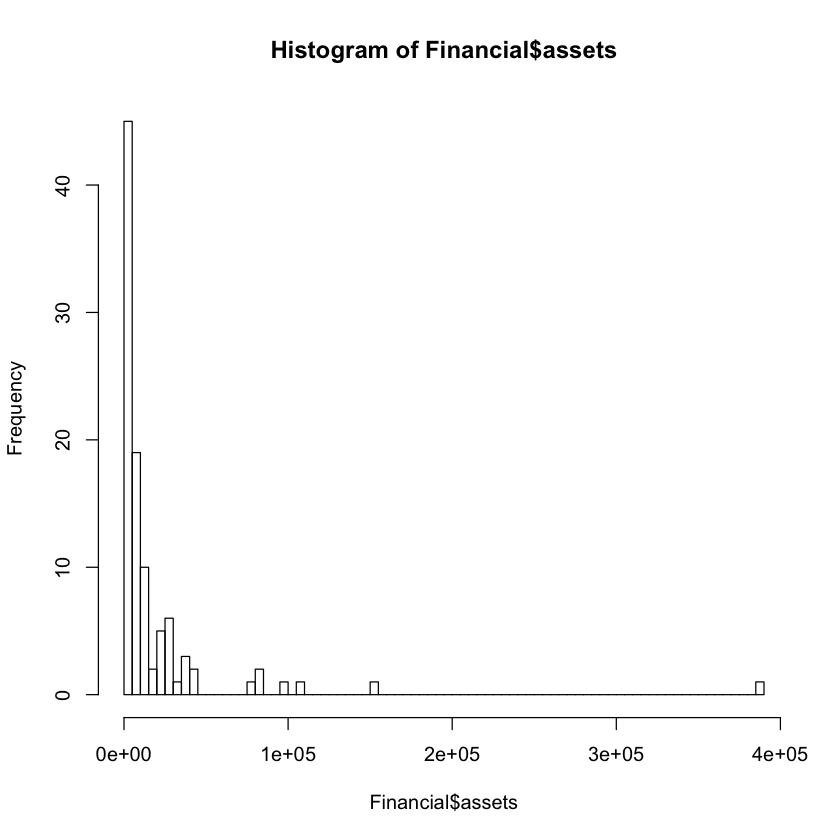

In [74]:
hist(Financial$assets, n=100)

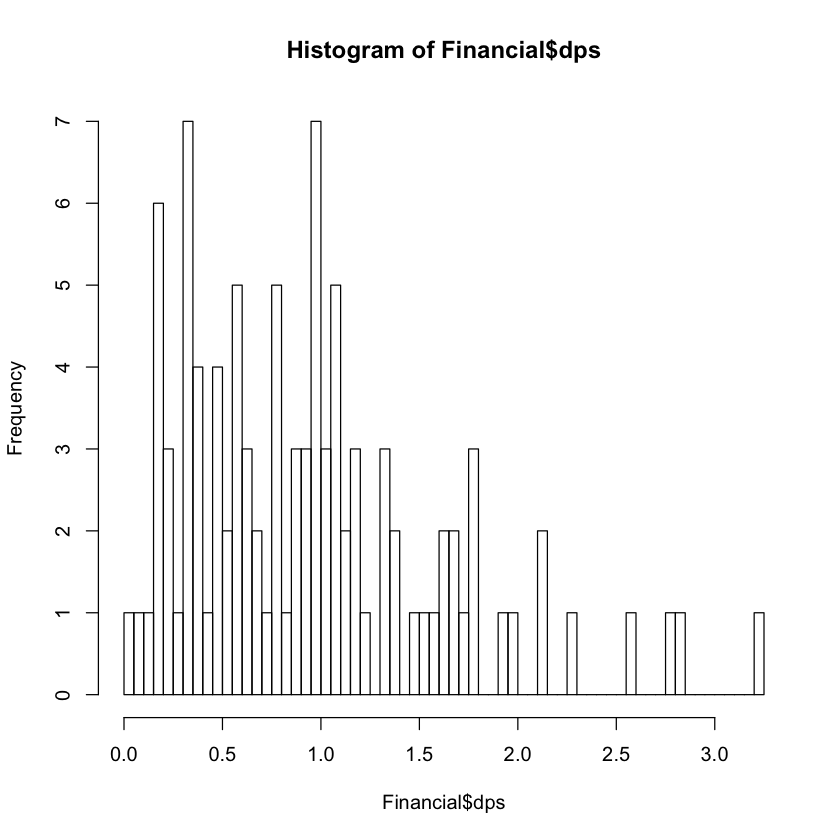

In [75]:
hist(Financial$dps, n=100)

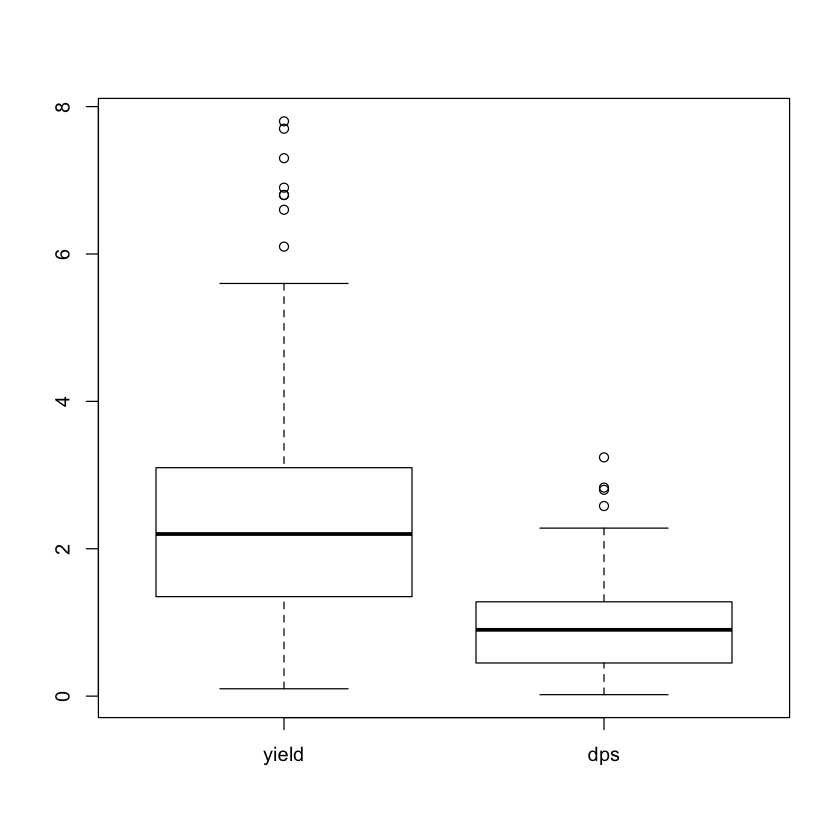

In [77]:
boxplot(Financial[c("yield", "dps")])

In [84]:
sprintf("stdev of yield: %g", sd(Financial$yield))
sprintf("stdev of dps: %g", sd(Financial$dps))

[1] "stdev of yield: 1.7376"

[1] "stdev of dps: 0.659244"

In [86]:
corrplot(cor(Financial[,3:9]))

ERROR: Error in corrplot(cor(Financial[, 3:9])): could not find function "corrplot"
